### Regression model V18
try gradient boosted regressor (see cell 14)

In [1]:
fileprefix='./lateness_PREP_V10_'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_X=pd.read_csv(fileprefix+'X.csv', sep='\t')

In [4]:
df_X.shape

(125675, 215)

In [5]:
df_y=pd.read_csv(fileprefix+'y.csv', sep='\t', header=None)

In [6]:
type(df_y)
df_y.shape

(125675, 2)

In [7]:
df_y.head()

,0,1
0,5,-497.0
1,6,5.0
2,7,-313.0
3,8,-296.0
4,9,-166.0


In [8]:
y=df_y[1]
y.head()

0   -497.0
1      5.0
2   -313.0
3   -296.0
4   -166.0
Name: 1, dtype: float64

In [9]:
y.shape

(125675,)

In [10]:
df_X.head()

,Unnamed: 0,organizer_home_lat,claimed_at_pdt_month_7,claimed_at_pdt_hour_1,driver_created_at_pdt_weekofyear,scheduled_starts_at_pdt_hour_1,scheduled_starts_at_pdt_weekday_4,origin_region_name_Malibu,is_same_day_ride_int,is_affiliate_int,...,claimed_at_pdt_quarter,origin_region_name_Peninsula South,scheduled_starts_at_pdt_month_3,claimed_at_pdt_weekday_3,claimed_at_pdt_hour_9,driver_created_at_pdt_hour,scheduled_starts_at_pdt_quarter_4,origin_region_name_East Contra Costa,scheduled_starts_at_pdt_month_5,lead_organizer_created_at_pdt_hour
0,5,34.17,0,0,27,0,0,0,0,0,...,1,0,0,0,0,15,0,0,0,19
1,6,34.08,0,0,27,0,0,0,0,0,...,1,0,0,0,0,15,0,0,0,19
2,7,34.16,0,0,27,0,0,0,0,0,...,1,0,0,0,0,15,0,0,0,20
3,8,34.05,0,0,27,0,0,0,0,0,...,1,0,0,0,0,15,0,0,0,20
4,9,34.12,0,0,27,0,0,0,0,0,...,1,0,0,0,0,15,0,0,0,19


In [11]:
y.describe().round()

count    125675.0
mean       -416.0
std         509.0
min       -1800.0
25%        -657.0
50%        -324.0
75%         -96.0
max        1800.0
Name: 1, dtype: float64

In [12]:
# break df_X,y into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.20, random_state=808)

In [13]:
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(100540, 215)
(25135, 215)
(100540,)
(25135,)


In [14]:
# select a regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(max_depth=4, random_state=808, n_estimators=200)

In [15]:
# fit model
model=model.fit(X_train,y_train)

In [16]:
print(model.feature_importances_)

[3.85907683e-03 4.43456448e-03 0.00000000e+00 0.00000000e+00
 1.09597329e-02 0.00000000e+00 5.12178302e-05 4.13494658e-03
 2.97151777e-04 1.09521863e-03 0.00000000e+00 5.69129626e-05
 8.27114099e-04 1.21511469e-04 1.24439764e-03 0.00000000e+00
 0.00000000e+00 2.35096733e-03 0.00000000e+00 1.11689293e-01
 0.00000000e+00 1.15902167e-03 5.30169783e-04 0.00000000e+00
 5.42884590e-03 7.13791875e-04 4.92887107e-04 5.84505039e-02
 9.57317482e-04 0.00000000e+00 1.62224804e-04 8.21593492e-04
 0.00000000e+00 5.00489075e-03 0.00000000e+00 7.67837008e-04
 1.66896216e-02 4.09367914e-04 0.00000000e+00 1.02700051e-02
 1.59702553e-03 8.84993465e-04 3.38346242e-05 5.88610717e-03
 0.00000000e+00 2.24300124e-03 2.10353590e-03 2.37682477e-03
 1.12199628e-02 6.88185214e-04 0.00000000e+00 3.80990334e-04
 4.09434223e-03 1.97799646e-04 3.56905079e-02 4.15205093e-04
 0.00000000e+00 3.32601671e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.65195070e-03 6.72253341e-04 3.44296086e-04
 0.00000000e+00 5.574291

In [17]:
importances = list(zip(model.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.15386207352307127, 'driver_id'),
 (0.11168929259269282, 'driver_home_lat'),
 (0.10408856294000675, 'driver_home_lon'),
 (0.05845050391008584, 'driver_created_at_pdt_dayofyear'),
 (0.04536507243003646, 'driver_previous_completed_trips'),
 (0.03758351491136549, 'driver_created_at_pdt_hour'),
 (0.03569050794712634, 'driver_created_at_pdt_day'),
 (0.03521297620917384, 'scheduled_starts_at_pdt_hour'),
 (0.03033605037433866, 'claimed_before_trip_start_secs'),
 (0.01868692493105692, 'driver_created_at_pdt_weekday'),
 (0.017374362395921425, 'driver_signup_before_trip_start_secs'),
 (0.016689621625723895, 'origin_location_id'),
 (0.01664706328847502, 'origin_lon'),
 (0.013221217573512285, 'driver_signup_before_trip_created_secs'),
 (0.012355989126396474, 'driver_signup_before_trip_claimed_secs'),
 (0.011219962773306683, 'scheduled_ends_at_pdt_hour'),
 (0.01095973288363682, 'driver_created_at_pdt_weekofyear'),
 (0.010270005074769934, 'lead_organizer_previous_completed_trips'),
 (0.0098926300

In [18]:
# top 10 importances
dict(importances[:10]).values()


dict_values(['driver_id', 'driver_home_lat', 'driver_home_lon', 'driver_created_at_pdt_dayofyear', 'driver_previous_completed_trips', 'driver_created_at_pdt_hour', 'driver_created_at_pdt_day', 'scheduled_starts_at_pdt_hour', 'claimed_before_trip_start_secs', 'driver_created_at_pdt_weekday'])

In [19]:
# number of non-zero features used
len([(i,f) for i, f in importances if i > 0])

144

In [20]:
# number of features wiht importance above 1%
len([(i,f) for i, f in importances if i > 0.01])

18

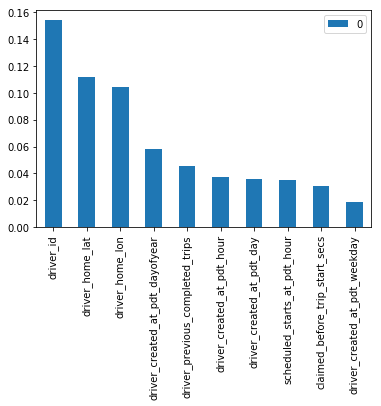

In [36]:
pd.DataFrame(importances[:10], index=[x for (_,x) in importances[:10] ]).plot(kind = 'bar')

In [22]:
# score against TRAINING set
model.score(X_train,y_train)

0.22747989476422925

In [23]:
# score against TEST set
model.score(X_test,y_test)

0.19806095714458216

In [24]:
model_y_test_pred = model.predict(X_test)
model_y_test_pred.size

25135

In [25]:
type(model_y_test_pred)

numpy.ndarray

In [26]:
model_y_test_pred[:10]

array([-448.56527558, -270.95134461, -583.78929274, -547.94887213,
       -367.70695698, -221.97450466, -225.38637958, -460.61554138,
       -477.89838041, -329.19884767])

In [27]:
pd.Series(model_y_test_pred).std()

181.9168189086847

In [28]:
pd.Series(model_y_test_pred).corr(y_test)

-0.012677338090677746

In [29]:
# regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from math import sqrt
print ("%.3f %.2f %.0f %.3f %.0f %.0f %.2f" % 
       (explained_variance_score(y_test, model_y_test_pred),
        sqrt(mean_squared_error(y_test, model_y_test_pred))/60, # sqrt of MSE in minutes
        mean_squared_error(y_test, model_y_test_pred), 
        r2_score(y_test, model_y_test_pred), 
        mean_absolute_error(y_test, model_y_test_pred), 
        median_absolute_error(y_test, model_y_test_pred),
        median_absolute_error(y_test, model_y_test_pred)/60 # MAE in minutes
       ))

0.198 7.65 210451 0.198 338 249 4.16


In [30]:
# make classifications from seconds late target
bins = np.array([0.0, 5*60, 15*60]) # 0 on-time, 1 almost on-time, 2 late, 3 extremely late
bins

array([  0., 300., 900.])

In [31]:
np.digitize(y_test, bins)[:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [32]:
# materialize y_test_class array
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
y_test_class=np.digitize(y_test, bins)
unique, counts = np.unique(y_test_class, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 21156]
 [    1  2939]
 [    2   892]
 [    3   148]]


In [33]:
# materialize model_y_pred_class
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
model_y_test_pred_class=np.digitize(model_y_test_pred, bins)
print(np.asarray(np.unique(model_y_test_pred_class, return_counts=True)).T)

[[    0 24926]
 [    1   145]
 [    2    54]
 [    3    10]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class,model_y_test_pred_class))

             precision    recall  f1-score   support

          0       0.85      1.00      0.91     21156
          1       0.30      0.01      0.03      2939
          2       0.30      0.02      0.03       892
          3       0.60      0.04      0.08       148

avg / total       0.76      0.84      0.77     25135



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_class,model_y_test_pred_class,labels=[0,1,2,3]))

[[21075    71     9     1]
 [ 2882    43    13     1]
 [  849    25    16     2]
 [  120     6    16     6]]
